Deep Learning desarrollo estudio para Capital Ganso, S.A.

V_4.0


In [0]:
# En primer lugar, activamos la GPU para trabajar con ella en los diferentes cálculos
#!pip freeze | grep -i tensorflow
# si vuestra versión no es la 1.15.0 o tenéis tensorflow en vez de tensorflow-gpu, haced:
 !pip install tensorflow-gpu==1.15.0

     |████████████████████████████████| 411.5MB 41kB/s 


In [0]:
pip install joblib

In [0]:
# En primer lugar, cargamos las librerías necesarias para iniciar nuestro proyecto

import numpy as np
import pandas as pd


import pickle
import json
import os
import csv

import warnings
warnings.filterwarnings('ignore')

import io

In [0]:
from google.colab import files

In [0]:
#Copiamos en nuestro directorio local los ficheros de datos para la práctica.
#Cargamos nuestro dataset desde nuestro diretorio local a través de la selección de fichero en cuadro de dialogo.
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving airbnb_clean.csv to airbnb_clean (1).csv
User uploaded file "airbnb_clean.csv" with length 2947918 bytes


In [0]:
# Empezamos con la incorporación de los datos del fichero csv de Airbnb para generar nuestro dataset
# Y visualizamos los primeros elementos de forma transversal

airbnb_Data = pd.read_csv("airbnb_clean.csv", sep=";", decimal=".")

airbnb_Data.head(5).T

,0,1,2,3,4
ID,6478626,4941335,12510355,4756811,15332216
Host Response Rate,84,100,100,100,100
Host Listings Count,3,1,2,8,2
Host Total Listings Count,3,1,2,8,2
Neighbourhood Group Cleansed,Retiro,Salamanca,Salamanca,Salamanca,Salamanca
City,Madrid,Madrid,Madrid,Madrid,Madrid
Zipcode,28007,28001,28001,28001,28001
Country Code,ES,ES,ES,ES,ES
Country,Spain,Spain,Spain,Spain,Spain
Latitude,40.407,40.4259,40.4284,40.4275,40.4287


In [0]:
#Calculamos el número de muestras y la dimensionalidad inicial.
N, d = airbnb_Data.shape
print(f'Numero de muestras actual es de {N} y la dimensionalidad es de {d}')

Numero de muestras actual es de 13236 y la dimensionalidad es de 41


In [0]:
#Verificamos el nombre de de cada columna(dimensión)
feature_names = airbnb_Data.columns[0:]
feature_names

Index(['ID', 'Host Response Rate', 'Host Listings Count',
       'Host Total Listings Count', 'Neighbourhood Group Cleansed', 'City',
       'Zipcode', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Square Feet', 'Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month'],
      dtype='object')

In [0]:
#Nuestro target es el precio, por lo tanto no podemos admitir registros sin precio
airbnb_Data.dropna(subset=['Price'],inplace=True)

In [0]:
#Transformamos los Feets con NaN a 0
airbnb_Data['Square Feet'].fillna(0, inplace = True)

In [0]:
from keras.utils import to_categorical
#Categorizamos las variables que intuitivamente creemos pueden tener influencia en el resultado final
#En el dataset de Training

# opción con LabelEncoder
from sklearn import preprocessing
le0 = preprocessing.LabelEncoder()
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le4 = preprocessing.LabelEncoder()
le5 = preprocessing.LabelEncoder()
le6 = preprocessing.LabelEncoder()
le7 = preprocessing.LabelEncoder()


airbnb_Data['Property Type'].fillna('nan', inplace = True)
le0.fit(airbnb_Data['Property Type'])
airbnb_Data['Property Type'] = le0.transform(airbnb_Data['Property Type'])

airbnb_Data['Bed Type'].fillna('nan', inplace = True)
le1.fit(airbnb_Data['Bed Type'])
airbnb_Data['Bed Type'] = le1.transform(airbnb_Data['Bed Type'])

airbnb_Data['Room Type'].fillna('nan', inplace = True)
le2.fit(airbnb_Data['Room Type'])
airbnb_Data['Room Type'] = le2.transform(airbnb_Data['Room Type'])

airbnb_Data['Cancellation Policy'].fillna('nan', inplace = True)
le4.fit(airbnb_Data['Cancellation Policy'])
airbnb_Data['Cancellation Policy'] = le4.transform(airbnb_Data['Cancellation Policy'])

airbnb_Data['Neighbourhood Group Cleansed'].fillna('nan', inplace = True)
le6.fit(airbnb_Data['Neighbourhood Group Cleansed'])
airbnb_Data['Neighbourhood Group Cleansed'] = le6.transform(airbnb_Data['Neighbourhood Group Cleansed'])

airbnb_Data['Zipcode'].fillna('00000', inplace = True)
le7.fit(airbnb_Data['Zipcode'])
airbnb_Data['Zipcode'] = le7.transform(airbnb_Data['Zipcode'])


print(list(le0.classes_))
print(list(le1.classes_))
print(list(le2.classes_))
print(list(le4.classes_))
print(list(le6.classes_))
print(list(le7.classes_))

['Apartment', 'Bed & Breakfast', 'Boat', 'Boutique hotel', 'Bungalow', 'Camper/RV', 'Casa particular', 'Chalet', 'Condominium', 'Dorm', 'Earth House', 'Guest suite', 'Guesthouse', 'Hostel', 'House', 'Loft', 'Other', 'Serviced apartment', 'Tent', 'Timeshare', 'Townhouse', 'Villa']
['Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed']
['Entire home/apt', 'Private room', 'Shared room']
['flexible', 'moderate', 'strict', 'super_strict_30', 'super_strict_60']
['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín', 'Chamberí', 'Ciudad Lineal', 'Fuencarral - El Pardo', 'Hortaleza', 'Latina', 'Moncloa - Aravaca', 'Moratalaz', 'Puente de Vallecas', 'Retiro', 'Salamanca', 'San Blas - Canillejas', 'Tetuán', 'Usera', 'Vicálvaro', 'Villa de Vallecas', 'Villaverde']
['00000', '20013', '20126', '2015', '25008', '27004', '27013', '28', '28001', '280013', '28002', '28002\n28002', '28003', '28004', '28005', '28006', '28007', '28008', '28009', '28010', '28011', '28012', '28013', '28014', '280

In [0]:
airbnb_Data.head(5)

,ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Neighbourhood Group Cleansed,City,Zipcode,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month
0,6478626,84.0,3.0,3.0,13,Madrid,16,ES,Spain,40.406953,-3.670894,0,1,2,2.0,1.0,1.0,4,0.0,28.0,NaN,NaN,1,5,1,1125,0,3,12,240,171,87.0,9.0,9.0,9.0,9.0,9.0,9.0,0,3.0,7.71
1,4941335,100.0,1.0,1.0,14,Madrid,8,ES,Spain,40.425904,-3.681647,0,0,2,1.0,0.0,1.0,4,0.0,58.0,100.0,NaN,1,0,2,1125,4,9,9,15,52,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.0,2.03
2,12510355,100.0,2.0,2.0,14,Madrid,8,ES,Spain,40.428352,-3.687155,0,0,3,1.0,0.0,2.0,4,0.0,70.0,150.0,30.0,2,15,2,1125,7,15,32,292,36,87.0,9.0,9.0,10.0,10.0,10.0,9.0,0,1.0,3.28
3,4756811,100.0,8.0,8.0,14,Madrid,8,ES,Spain,40.427454,-3.685763,0,1,1,1.0,1.0,1.0,4,0.0,26.0,NaN,NaN,1,0,7,1125,14,37,59,334,15,95.0,10.0,9.0,10.0,10.0,10.0,9.0,2,7.0,0.57
4,15332216,100.0,2.0,2.0,14,Madrid,8,ES,Spain,40.428671,-3.685423,0,0,6,1.0,2.0,3.0,4,0.0,70.0,NaN,20.0,1,10,2,1125,0,0,0,52,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,NaN


In [0]:
#Una vez hemos aplicado todos los filtros hasta este momento y teniendo en cuenta que hemos 
#seleccionado solamente los datos de Madrid, las dimensiones de City,Country Code y Country, no las categorizamos
#y procedemos a hacer un drop de ellas.
airbnb_Data.drop(['City','Country Code','Country'],axis=1,inplace=True)


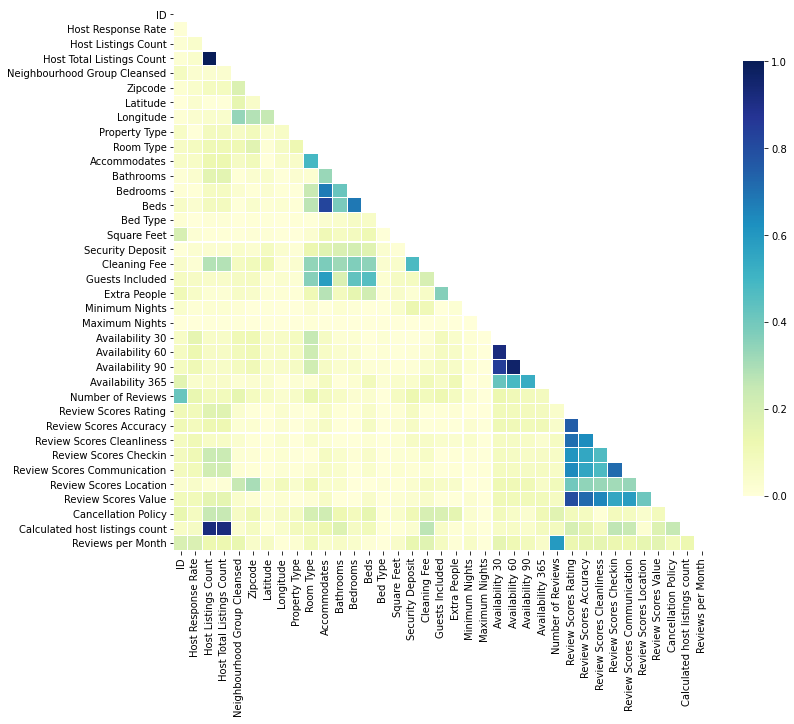

In [0]:
#Ahora haremos un estudio de variables fuertemente correladas para hacer un dataset más limpio 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline 

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnb_Data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [0]:
#Procedemos a eliminar las variables altamente correladas.

airbnb_Data.drop(['ID','Host Listings Count','Host Total Listings Count','Accommodates','Availability 30'
                  , 'Availability 60', 'Availability 90','Availability 365','Review Scores Rating'
                  ,'Review Scores Accuracy','Review Scores Checkin','Host Listings Count'],
                 axis=1,inplace=True)

In [0]:
#Revisamos los nobres para sustituirlos por otros sin espacios.
airbnb_Data.columns[0:]

Index(['Host Response Rate', 'Neighbourhood Group Cleansed', 'Zipcode',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Square Feet', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Number of Reviews',
       'Review Scores Cleanliness', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month'],
      dtype='object')

In [0]:
#Una vez hemos determinado que dimensiones no van quedando, procedemos a cambiar el nombre de las columnas.
airbnb_Data.columns = ['response_rate','barrios', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'square_feet', 'Price', 'security_deposit', 'cleaning_fee',
       'guests_inc', 'extra_people', 'min_nights', 'max_nights',
       'num_reviews', 'rs_cleanliness',
       'rs_communication', 'rs_location',
       'rs_value', 'cancellation_policy',
       'calculated_host', 'reviews_month']


In [0]:
print (airbnb_Data.dtypes)

response_rate          float64
barrios                  int64
zipcode                  int64
latitude               float64
longitude              float64
property_type            int64
room_type                int64
bathrooms              float64
bedrooms               float64
beds                   float64
bed_type                 int64
square_feet            float64
Price                  float64
security_deposit       float64
cleaning_fee           float64
guests_inc               int64
extra_people             int64
min_nights               int64
max_nights               int64
num_reviews              int64
rs_cleanliness         float64
rs_communication       float64
rs_location            float64
rs_value               float64
cancellation_policy      int64
calculated_host        float64
reviews_month          float64
dtype: object


In [0]:
#Reemplazamos todos los valores nulos del dataset con 0
airbnb_Data.fillna(0, inplace = True)


In [0]:
#Hacemos la comprobación de que no nos han quedado valores nulos
airbnb_Data.isnull().any()

response_rate          False
barrios                False
zipcode                False
latitude               False
longitude              False
property_type          False
room_type              False
bathrooms              False
bedrooms               False
beds                   False
bed_type               False
square_feet            False
Price                  False
security_deposit       False
cleaning_fee           False
guests_inc             False
extra_people           False
min_nights             False
max_nights             False
num_reviews            False
rs_cleanliness         False
rs_communication       False
rs_location            False
rs_value               False
cancellation_policy    False
calculated_host        False
reviews_month          False
dtype: bool

In [0]:
#Procedemos a eliminar outliers de Price<=500 bedrooms<=5 bathrooms<=5
my_filter1 = airbnb_Data['Price']<=500
my_filter2 = airbnb_Data['bedrooms']<=5
my_filter3 = airbnb_Data['bathrooms']<=5
airbnb_Data = airbnb_Data[my_filter1]
airbnb_Data = airbnb_Data[my_filter2]
airbnb_Data = airbnb_Data[my_filter3]


# Empezamos a tratar nuestra red NN para predecir los precios, sólo con los datos de nuestro dataset (regresión)

In [0]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [0]:
#Variables, asignamos la x y y normalizamos
y = airbnb_Data['Price'].values   # nos quedamos con la columna Price
x = airbnb_Data[airbnb_Data.columns.drop(['Price'])].values # nos quedamos con el resto

y=np.reshape(y, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [0]:
#Separamos el dataset en train y test ya con los datos normalizados
#X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.20, shuffle=True, random_state=0)

In [0]:
#Separamos el dataset en train y test ya con los datos normalizados
#X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)
X_train, X_test, y_train, y_test = train_test_split(xscale, y, test_size=0.20, shuffle=True, random_state=0)

In [0]:
model = Sequential()
model.add(Dense(12, input_dim=26, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                324       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 437
Trainable params: 437
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
#history = model.fit(X_train, y_train, epochs=150, batch_size=50, verbose=1,validation_split=0.2,validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, epochs=200, batch_size=50, verbose=1,validation_data=(X_test, y_test))

Train on 10533 samples, validate on 2634 samples
Epoch 1/200
10533/10533 [==============================] - 1s 68us/sample - loss: 6492.9985 - mean_squared_error: 6492.9976 - mean_absolute_error: 63.0394 - val_loss: 5760.2177 - val_mean_squared_error: 5760.2183 - val_mean_absolute_error: 58.2699
Epoch 2/200
10533/10533 [==============================] - 1s 54us/sample - loss: 4912.2834 - mean_squared_error: 4912.2817 - mean_absolute_error: 49.2285 - val_loss: 3537.6561 - val_mean_squared_error: 3537.6565 - val_mean_absolute_error: 38.0650
Epoch 3/200
10533/10533 [==============================] - 1s 58us/sample - loss: 2995.0445 - mean_squared_error: 2995.0452 - mean_absolute_error: 33.9483 - val_loss: 2471.9516 - val_mean_squared_error: 2471.9514 - val_mean_absolute_error: 31.7617
Epoch 4/200
10533/10533 [==============================] - 1s 57us/sample - loss: 2503.8093 - mean_squared_error: 2503.8098 - mean_absolute_error: 32.2174 - val_loss: 2343.7501 - val_mean_squared_error: 2343

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


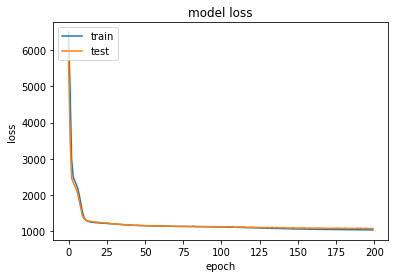

In [0]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from tensorflow import keras
# Guardar el Modelo
model.save('path_to_my_model.h5')


In [0]:
# Recrea exactamente el mismo modelo solo desde el archivo
new_model = keras.models.load_model('path_to_my_model.h5')
new_model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
new_predictions = new_model.predict(X_test)
#new_model.score(X_test, y_test)
print(new_predictions)
new_model.summary()

[[38.628456]
 [65.58418 ]
 [63.475574]
 ...
 [26.817638]
 [19.089066]
 [31.22425 ]]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                324       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 437
Trainable params: 437
Non-trainable params: 0
_________________________________________________________________
